In [1]:
cd D:\\Saarbrucken\\EDA_Research\\vae-disentanglement\\disentanglement_lib_pl

D:\Saarbrucken\EDA_Research\vae-disentanglement\disentanglement_lib_pl


In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import namedtuple
from matplotlib import cm as mpl_colormaps
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import torch
import torchvision.utils as vutils
import torchvision.transforms.functional as T
from torch.utils.data import DataLoader
from torchvision import transforms

import models
from common.data_loader import DSpritesDataset, ThreeShapesDataset, ContinumDataset
#from common import notebook_utils
from common import utils
#from common.notebook_utils import *
from common import notebook_utils as nbutils
from common.utils import CenteredNorm
from gnncsvae_experiment import GNNCSVAEExperiment
from common.ops import reparametrize
# Change figure aesthetics
%matplotlib inline
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 1.5})
np.set_printoptions(suppress=True,precision=4)

In [3]:
waterflow_labels_df = pd.read_csv('../datasets/waterflow/waterflow_labels.csv')

In [4]:
waterflow_labels_df.head()

,ball_size,water_level,hole_position,waterflow
0,0.166667,1.00463,2.000000,1.718607
1,0.166667,1.00463,2.333333,1.899992
2,0.166667,1.00463,2.666667,2.065509
3,0.166667,1.00463,3.000000,2.218713
4,0.166667,1.00463,3.333333,2.362000


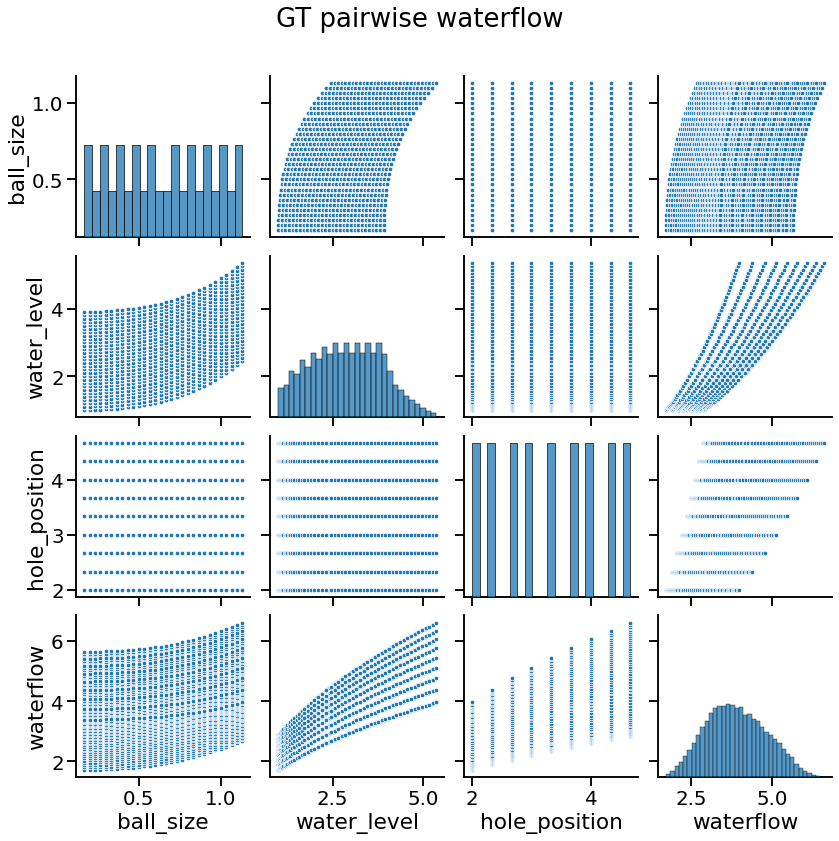

In [5]:
sns_plot = sns.pairplot(waterflow_labels_df, markers=".", height=3.0)
sns_plot.fig.suptitle("GT pairwise waterflow")
sns_plot.fig.subplots_adjust(top=0.9)

In [6]:
cols = ["ball_size", "water_level", "hole_position", "waterflow"]
waterflow_labels_np = waterflow_labels_df.to_numpy()
waterflow_covmat = np.cov(waterflow_labels_np.T)
waterflow_covmat_df = pd.DataFrame(waterflow_covmat, cols, cols)

In [10]:
waterflow_covmat_df

In [19]:
# see information matrix to reveal conditional independence structure
# x_i ind x_j given all other Xs iff the (i,j)th entry is zero

waterflow_infomat = pd.DataFrame(np.linalg.inv(waterflow_covmat), cols, cols)

,ball_size,water_level,hole_position,waterflow
ball_size,14.623769,-2.243966,-0.408762,0.574519
water_level,-2.243966,28.876210,27.831668,-39.117643
hole_position,-0.408762,27.831668,29.436938,-39.476661
waterflow,0.574519,-39.117643,-39.476661,55.484778


In [47]:
cols = ["switch_state", "light_state", "light_pos", "pendulum_pos","shadow_pos","shadow_len"]

pendulum_switch_df = pd.read_csv('../datasets/pendulum_switch/pendulum_switch_labels.csv')

pendulum_switch_np = pendulum_switch_df.to_numpy()
pendulum_switch_covmat = np.cov(pendulum_switch_np.T)
pendulum_switch_covmat_df = pd.DataFrame(pendulum_switch_covmat, cols, cols)

In [48]:
pendulum_switch_covmat_df
pendulum_switch_covmat_df.style.format("{:.3f}")

,switch_state,light_state,light_pos,pendulum_pos,shadow_pos,shadow_len
switch_state,0.250,0.250,-0.000,-0.000,0.000,0.000
light_state,0.250,0.250,-0.000,-0.000,0.000,0.000
light_pos,-0.000,-0.000,0.304,-0.000,-0.013,0.127
pendulum_pos,-0.000,-0.000,-0.000,0.408,0.022,0.251
shadow_pos,0.000,0.000,-0.013,0.022,0.100,0.009
shadow_len,0.000,0.000,0.127,0.251,0.009,0.209


In [51]:
eps = 1e-3
pendulum_switch_infomat = pd.DataFrame(np.linalg.inv(pendulum_switch_covmat + eps*np.eye(6)), cols, cols)
pendulum_switch_infomat.style.format("{:.3f}")

,switch_state,light_state,light_pos,pendulum_pos,shadow_pos,shadow_len
switch_state,500.998,-499.002,0.000,0.000,0.000,-0.000
light_state,-499.002,500.998,0.000,0.000,0.000,-0.000
light_pos,0.000,0.000,78.231,109.869,1.901,-179.052
pendulum_pos,0.000,0.000,109.869,163.638,1.624,-262.591
shadow_pos,0.000,0.000,1.901,1.624,10.137,-3.523
shadow_len,-0.000,-0.000,-179.052,-262.591,-3.523,427.853
